In [122]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers

In [32]:
df = pd.read_csv("./archive (2)/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [33]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [382]:
print(df['CarName'].value_counts())

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64


In [18]:
print (df["fueltype"].value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64


In [19]:
print(df['drivewheel'].value_counts())

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


In [20]:
print(df['aspiration'].value_counts())

std      168
turbo     37
Name: aspiration, dtype: int64


In [35]:
print(df['enginelocation'].value_counts())

front    202
rear       3
Name: enginelocation, dtype: int64


In [36]:
# enginelocation is the only column with imbalance data that doesn't show correlation with price! so we will remove that.
df = df.drop('enginelocation', axis=1)

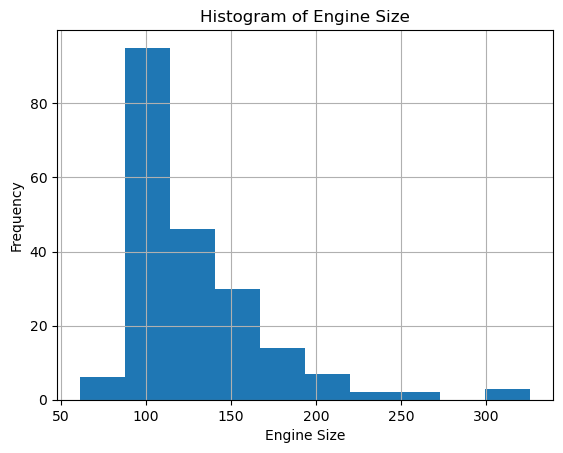

In [37]:
# Create a histogram
df['enginesize'].hist()

# Set labels and title
plt.xlabel('Engine Size')
plt.ylabel('Frequency')
plt.title('Histogram of Engine Size')

# Display the histogram
plt.show()

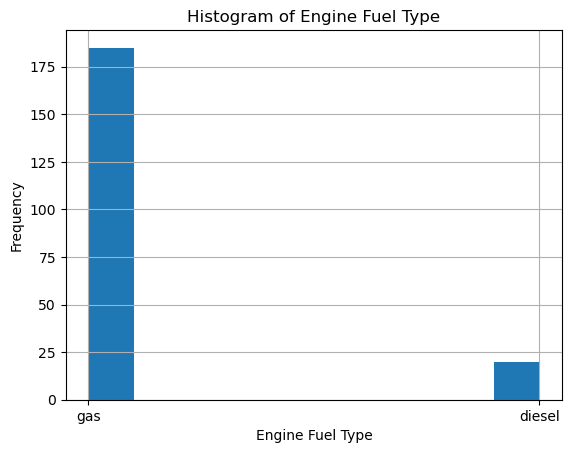

In [38]:
# Create a histogram
df['fueltype'].hist()

# Set labels and title
plt.xlabel('Engine Fuel Type')
plt.ylabel('Frequency')
plt.title('Histogram of Engine Fuel Type')

# Display the histogram
plt.show()

# we add some changes to data and trim to help model learn better.
- remove columns tha are not informative like "car_ID" column
- convert some columns to integer coded values.
- convert qualitative columns to one-hot encoded values to help model include those features in training process.
- scale numeric features with Standard Scaler or MinMaxScaler.

In [39]:
# in this section, since we now nuber of cilenders is an importan and have a positive correlation with price we convert it to 
# numbers.
integer_cylindernumber = {"three": 3,
                          "four" : 4,
                          "six" : 6,
                          "eight" : 8,
                          "five": 5,
                          "twelve" : 12,
                          "two" : 2 }

df = df.replace({"cylindernumber" : integer_cylindernumber})
df['cylindernumber']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64

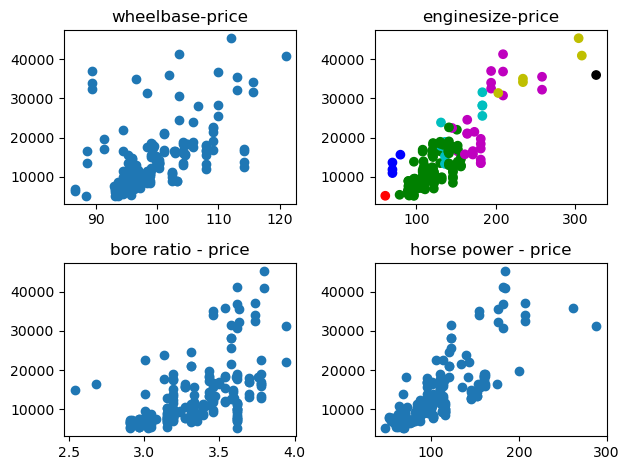

In [40]:
# you can also set the price on log scale but without doing that you still see correlation between price and some features.

# you can map and monitor some categorigal features on scatter plot like fueltype that we mapped on second scatterplot.
# we will contine this mapping for those columns that have imbalanced values that don't show any correlation with price.
# then we remove those columns from our data.
# enginelocation is the only column with imbalance data that doesn't show correlation with price.

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)
plt.scatter(df['wheelbase'], df['price'])
plt.title('wheelbase-price')

plt.subplot(2, 2, 2)
colors = df['cylindernumber'].map({2:'b', 3: 'r', 4:'g', 5:'c', 6:'m',8:'y',12:'k' }).tolist()  # Map enginelocation values to colors
plt.scatter(df['enginesize'], df['price'], c=colors)
plt.title('enginesize-price')


plt.subplot(2, 2, 3)
plt.scatter(df['boreratio'], df['price'])
plt.title('bore ratio - price')

plt.subplot(2, 2, 4)
plt.scatter(df['horsepower'], df['price'])
plt.title('horse power - price')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# note:
- in next steps we gonna use pd.get_dummies(df) to convert qualitative data to one-hot encoded variables.
- This command result new columns in our data. As we have limited data it might cause our model to overfitt.
- To addressing this problem we choose columns that have redundant information or column with imbalance varaiable which doesn't show any correlation with price, and then we will remove those columns. This will help model to learn better.

In [44]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [46]:
# we also want to drop the ID column. since it doesn't give any information about price of cars.
df = df.drop('car_ID', axis=1)


In [48]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [49]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df)
df_encoded

# Separate target variable and features
X = df_encoded.drop('price', axis=1)  # Features (input variables)
y = df_encoded['price']  # Target variable

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Verify the shapes of the data
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (174, 191)
X_test shape: (31, 191)
y_train shape: (174,)
y_test shape: (31,)


In [50]:
df_encoded

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,...,1,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [51]:
# result shows we don't need to make correction for null values.
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
X_train

# make training and testing datasets from dataframe:

In [52]:
# now allocate 15% of the training set to validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (147, 191)
X_test shape: (31, 191)
y_train shape: (147,)
y_test shape: (31,)
X_val shape: (27, 191)
y_val shape: (27,)


In [62]:
# define a model
model = keras.models.Sequential([
    keras.layers.Dense(60, activation="relu"),
    keras.layers.Dense(120, activation="relu"),
    keras.layers.Dense(120, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)
])

In [63]:
learning_rate = 0.001
optimizer = SGD(learning_rate=learning_rate)

model.compile(loss="mean_squared_error",
              optimizer=optimizer,
              metrics=["mean_absolute_error"])

In [64]:
history_1 = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
5/5 [==============================] - 1s 71ms/step - loss: 73081192448.0000 - mean_absolute_error: 122866.3672 - val_loss: 204196752.0000 - val_mean_absolute_error: 12697.0820
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 265768800.0000 - mean_absolute_error: 14297.3535 - val_loss: 200598464.0000 - val_mean_absolute_error: 12554.5859
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 261727152.0000 - mean_absolute_error: 14156.6221 - val_loss: 197058880.0000 - val_mean_absolute_error: 12412.8193
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 257742304.0000 - mean_absolute_error: 14015.7891 - val_loss: 193556864.0000 - val_mean_absolute_error: 12270.9424
Epoch 5/100
5/5 [==============================] - 0s 16ms/step - loss: 253808976.0000 - mean_absolute_error: 13870.5137 - val_loss: 190168672.0000 - val_mean_absolute_error: 12132.0986
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - l

5/5 [==============================] - 0s 12ms/step - loss: 147887024.0000 - mean_absolute_error: 9301.2070 - val_loss: 100609704.0000 - val_mean_absolute_error: 7591.3682
Epoch 46/100
5/5 [==============================] - 0s 12ms/step - loss: 146181120.0000 - mean_absolute_error: 9210.5254 - val_loss: 99212632.0000 - val_mean_absolute_error: 7498.7852
Epoch 47/100
5/5 [==============================] - 0s 11ms/step - loss: 144505920.0000 - mean_absolute_error: 9118.2510 - val_loss: 97902440.0000 - val_mean_absolute_error: 7410.9102
Epoch 48/100
5/5 [==============================] - 0s 11ms/step - loss: 142902480.0000 - mean_absolute_error: 9033.4834 - val_loss: 96553880.0000 - val_mean_absolute_error: 7319.3604
Epoch 49/100
5/5 [==============================] - 0s 11ms/step - loss: 141260192.0000 - mean_absolute_error: 8939.7637 - val_loss: 95229112.0000 - val_mean_absolute_error: 7228.2959
Epoch 50/100
5/5 [==============================] - 0s 11ms/step - loss: 139649840.0000 - me

In [65]:

# Calculate RMSE
train_rmse = np.sqrt(min(history_1.history['loss']))
val_rmse = np.sqrt(min(history_1.history['val_loss']))

# Print metrics
print('Minimum training loss:', min(history_1.history['loss']))
print('Maximum training loss:', max(history_1.history['loss']))
print('Training RMSE:', train_rmse)
print('\n')
print('Minimum validation loss:', min(history_1.history['val_loss']))
print('Maximum validation loss:', max(history_1.history['val_loss']))
print('Validation RMSE:', val_rmse)
print('\n')
print('Minimum Mean Absolute Error:', min(history_1.history['mean_absolute_error']))
print('Maximum Mean Absolute Error:', max(history_1.history['mean_absolute_error']))



Minimum training loss: 90070992.0
Maximum training loss: 73081192448.0
Training RMSE: 9490.573849878625


Minimum validation loss: 56458644.0
Maximum validation loss: 204196752.0
Validation RMSE: 7513.896725401541


Minimum Mean Squared Error: 6066.61474609375
Maximum Mean Squared Error: 122866.3671875


In [60]:
len(history_1.history['mean_absolute_error'])

100

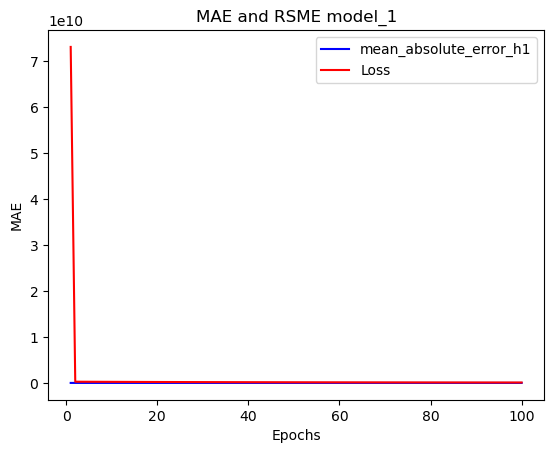

In [72]:
mean_absolute_error_model1 = history_1.history['mean_absolute_error']
epochs = range(1, len(mean_absolute_error_model1) + 1)  # Use the correct key here

plt.plot(epochs, mean_absolute_error_model1, 'b', label='mean_absolute_error_h1')
plt.plot(epochs, history_1.history['loss'], 'r', label='Loss')

plt.title('MAE and RSME model_1')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [68]:
print(history_1.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


# Models with one hidden layer and neurons between 50-500:

In [73]:
# define a model
h1_model_50n = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1)
])

In [74]:
learning_rate = 0.001
optimizer = SGD(learning_rate=learning_rate)

h1_model_50n.compile(loss="mean_squared_error",
              optimizer=optimizer,
              metrics=["mean_absolute_error"])

In [75]:
history_h1_50n = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
5/5 [==============================] - 0s 33ms/step - loss: 89498904.0000 - mean_absolute_error: 6045.3687 - val_loss: 56089156.0000 - val_mean_absolute_error: 4611.2568
Epoch 2/100
5/5 [==============================] - 0s 17ms/step - loss: 88966392.0000 - mean_absolute_error: 6027.5220 - val_loss: 55730180.0000 - val_mean_absolute_error: 4599.6323
Epoch 3/100
5/5 [==============================] - 0s 17ms/step - loss: 88439144.0000 - mean_absolute_error: 6007.8677 - val_loss: 55363972.0000 - val_mean_absolute_error: 4590.0664
Epoch 4/100
5/5 [==============================] - 0s 16ms/step - loss: 87913920.0000 - mean_absolute_error: 5987.2231 - val_loss: 55005036.0000 - val_mean_absolute_error: 4580.5527
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 87384832.0000 - mean_absolute_error: 5968.2295 - val_loss: 54666132.0000 - val_mean_absolute_error: 4571.4385
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 86884704.0000 - me

Epoch 46/100
5/5 [==============================] - 0s 14ms/step - loss: 72805440.0000 - mean_absolute_error: 5589.3628 - val_loss: 45903392.0000 - val_mean_absolute_error: 4524.9575
Epoch 47/100
5/5 [==============================] - 0s 13ms/step - loss: 72579008.0000 - mean_absolute_error: 5586.4033 - val_loss: 45781648.0000 - val_mean_absolute_error: 4526.2905
Epoch 48/100
5/5 [==============================] - 0s 12ms/step - loss: 72340200.0000 - mean_absolute_error: 5583.8154 - val_loss: 45674768.0000 - val_mean_absolute_error: 4527.4849
Epoch 49/100
5/5 [==============================] - 0s 12ms/step - loss: 72131680.0000 - mean_absolute_error: 5581.5742 - val_loss: 45563108.0000 - val_mean_absolute_error: 4528.7583
Epoch 50/100
5/5 [==============================] - 0s 13ms/step - loss: 71906152.0000 - mean_absolute_error: 5580.1558 - val_loss: 45461064.0000 - val_mean_absolute_error: 4529.9458
Epoch 51/100
5/5 [==============================] - 0s 12ms/step - loss: 71698416.000

Epoch 91/100
5/5 [==============================] - 0s 12ms/step - loss: 65964888.0000 - mean_absolute_error: 5582.2388 - val_loss: 43210980.0000 - val_mean_absolute_error: 4631.2505
Epoch 92/100
5/5 [==============================] - 0s 12ms/step - loss: 65873640.0000 - mean_absolute_error: 5585.2979 - val_loss: 43191708.0000 - val_mean_absolute_error: 4636.5713
Epoch 93/100
5/5 [==============================] - 0s 12ms/step - loss: 65784280.0000 - mean_absolute_error: 5585.7734 - val_loss: 43171224.0000 - val_mean_absolute_error: 4642.5024
Epoch 94/100
5/5 [==============================] - 0s 13ms/step - loss: 65694936.0000 - mean_absolute_error: 5589.0498 - val_loss: 43156408.0000 - val_mean_absolute_error: 4646.9922
Epoch 95/100
5/5 [==============================] - 0s 11ms/step - loss: 65618052.0000 - mean_absolute_error: 5589.1089 - val_loss: 43139840.0000 - val_mean_absolute_error: 4652.2446
Epoch 96/100
5/5 [==============================] - 0s 12ms/step - loss: 65534260.000

In [76]:
print('Minimum training loss:',min(history_h1_50n.history['loss']))
print('Maximum training loss:',max(history_h1_50n.history['loss']))
print('\n')
print('Minimum validation loss:',min(history_h1_50n.history['val_loss']))
print('Maximum validation loss:',max(history_h1_50n.history['val_loss']))
print('\n')
print('Minimum Mean Absolute Error:',min(history_h1_50n.history['mean_absolute_error']))
print('Maximum Mean Absolute Error:',max(history_h1_50n.history['mean_absolute_error']))

Minimum training loss: 65209184.0
Maximum training loss: 89498904.0


Minimum validation loss: 43068620.0
Maximum validation loss: 56089156.0


Minimum Mean Absolute Error: 5565.65966796875
Maximum Mean Absolute Error: 6045.36865234375


# h1_model_150n

In [77]:
# define a model
h1_model_150n = keras.models.Sequential([
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(1)
])

In [78]:
learning_rate = 0.001
optimizer = SGD(learning_rate=learning_rate)

h1_model_150n.compile(loss="mean_squared_error",
              optimizer=optimizer,
              metrics=["mean_absolute_error"])

In [79]:
history_h1_150n = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
5/5 [==============================] - 0s 30ms/step - loss: 65134524.0000 - mean_absolute_error: 5598.3701 - val_loss: 43057668.0000 - val_mean_absolute_error: 4683.7622
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 65056184.0000 - mean_absolute_error: 5599.6660 - val_loss: 43047828.0000 - val_mean_absolute_error: 4688.5239
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 64988140.0000 - mean_absolute_error: 5600.8701 - val_loss: 43038512.0000 - val_mean_absolute_error: 4693.3633
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 64919804.0000 - mean_absolute_error: 5601.9604 - val_loss: 43030068.0000 - val_mean_absolute_error: 4698.1011
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 64846640.0000 - mean_absolute_error: 5603.8755 - val_loss: 43022152.0000 - val_mean_absolute_error: 4702.9312
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 64782676.0000 - me

Epoch 46/100
5/5 [==============================] - 0s 14ms/step - loss: 62892652.0000 - mean_absolute_error: 5683.6167 - val_loss: 43159620.0000 - val_mean_absolute_error: 4867.9272
Epoch 47/100
5/5 [==============================] - 0s 13ms/step - loss: 62860016.0000 - mean_absolute_error: 5684.8491 - val_loss: 43172004.0000 - val_mean_absolute_error: 4872.7290
Epoch 48/100
5/5 [==============================] - 0s 13ms/step - loss: 62832124.0000 - mean_absolute_error: 5687.3003 - val_loss: 43184904.0000 - val_mean_absolute_error: 4877.5649
Epoch 49/100
5/5 [==============================] - 0s 12ms/step - loss: 62792684.0000 - mean_absolute_error: 5689.0518 - val_loss: 43196364.0000 - val_mean_absolute_error: 4881.7339
Epoch 50/100
5/5 [==============================] - 0s 12ms/step - loss: 62761656.0000 - mean_absolute_error: 5691.4092 - val_loss: 43208132.0000 - val_mean_absolute_error: 4885.9038
Epoch 51/100
5/5 [==============================] - 0s 13ms/step - loss: 62731056.000

Epoch 91/100
5/5 [==============================] - 0s 12ms/step - loss: 61985988.0000 - mean_absolute_error: 5754.8960 - val_loss: 43728360.0000 - val_mean_absolute_error: 5015.1851
Epoch 92/100
5/5 [==============================] - 0s 13ms/step - loss: 61976624.0000 - mean_absolute_error: 5756.2588 - val_loss: 43738736.0000 - val_mean_absolute_error: 5017.1777
Epoch 93/100
5/5 [==============================] - 0s 12ms/step - loss: 61966864.0000 - mean_absolute_error: 5756.9824 - val_loss: 43752864.0000 - val_mean_absolute_error: 5019.8711
Epoch 94/100
5/5 [==============================] - 0s 12ms/step - loss: 61955868.0000 - mean_absolute_error: 5758.3237 - val_loss: 43767420.0000 - val_mean_absolute_error: 5022.6182
Epoch 95/100
5/5 [==============================] - 0s 13ms/step - loss: 61943816.0000 - mean_absolute_error: 5760.7183 - val_loss: 43775848.0000 - val_mean_absolute_error: 5024.1973
Epoch 96/100
5/5 [==============================] - 0s 12ms/step - loss: 61935896.000

In [80]:
print('Minimum training loss:',min(history_h1_150n.history['loss']))
print('Maximum training loss:',max(history_h1_150n.history['loss']))
print('\n')
print('Minimum validation loss:',min(history_h1_150n.history['val_loss']))
print('Maximum validation loss:',max(history_h1_150n.history['val_loss']))
print('\n')
print('Minimum Mean Absolute Error:',min(history_h1_150n.history['mean_absolute_error']))
print('Maximum Mean Absolute Error:',max(history_h1_150n.history['mean_absolute_error']))

Minimum training loss: 61880040.0
Maximum training loss: 65134524.0


Minimum validation loss: 42980848.0
Maximum validation loss: 43854288.0


Minimum Mean Squared Error: 5598.3701171875
Maximum Mean Squared Error: 5766.76806640625


# h1_model_250n

In [81]:
# define a model
h1_model_250n = keras.models.Sequential([
    keras.layers.Dense(250, activation="relu"),
    keras.layers.Dense(1)
])

In [82]:
learning_rate = 0.001
optimizer = SGD(learning_rate=learning_rate)

h1_model_250n.compile(loss="mean_squared_error",
              optimizer=optimizer,
              metrics=["mean_absolute_error"])

In [83]:
history_h1_250n = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
5/5 [==============================] - 0s 30ms/step - loss: 61872600.0000 - mean_absolute_error: 5767.8184 - val_loss: 43872536.0000 - val_mean_absolute_error: 5041.7529
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 61858864.0000 - mean_absolute_error: 5769.8271 - val_loss: 43882824.0000 - val_mean_absolute_error: 5043.5630
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 61849992.0000 - mean_absolute_error: 5770.8408 - val_loss: 43896500.0000 - val_mean_absolute_error: 5045.9556
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 61840448.0000 - mean_absolute_error: 5771.6685 - val_loss: 43908464.0000 - val_mean_absolute_error: 5048.0308
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 61832144.0000 - mean_absolute_error: 5772.2749 - val_loss: 43921996.0000 - val_mean_absolute_error: 5050.3657
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 61822356.0000 - me

Epoch 46/100
5/5 [==============================] - 0s 12ms/step - loss: 61572596.0000 - mean_absolute_error: 5814.1299 - val_loss: 44407304.0000 - val_mean_absolute_error: 5127.5293
Epoch 47/100
5/5 [==============================] - 0s 13ms/step - loss: 61569560.0000 - mean_absolute_error: 5814.7432 - val_loss: 44418740.0000 - val_mean_absolute_error: 5129.4761
Epoch 48/100
5/5 [==============================] - 0s 12ms/step - loss: 61563736.0000 - mean_absolute_error: 5816.3042 - val_loss: 44427564.0000 - val_mean_absolute_error: 5130.9722
Epoch 49/100
5/5 [==============================] - 0s 12ms/step - loss: 61564008.0000 - mean_absolute_error: 5817.5815 - val_loss: 44432048.0000 - val_mean_absolute_error: 5131.7314
Epoch 50/100
5/5 [==============================] - 0s 12ms/step - loss: 61557712.0000 - mean_absolute_error: 5817.2300 - val_loss: 44443920.0000 - val_mean_absolute_error: 5133.7344
Epoch 51/100
5/5 [==============================] - 0s 14ms/step - loss: 61554884.000

Epoch 91/100
5/5 [==============================] - 0s 12ms/step - loss: 61453500.0000 - mean_absolute_error: 5846.8003 - val_loss: 44811932.0000 - val_mean_absolute_error: 5192.2383
Epoch 92/100
5/5 [==============================] - 0s 11ms/step - loss: 61449788.0000 - mean_absolute_error: 5846.1860 - val_loss: 44816828.0000 - val_mean_absolute_error: 5192.9751
Epoch 93/100
5/5 [==============================] - 0s 12ms/step - loss: 61448868.0000 - mean_absolute_error: 5847.1104 - val_loss: 44825960.0000 - val_mean_absolute_error: 5194.3467
Epoch 94/100
5/5 [==============================] - 0s 11ms/step - loss: 61446848.0000 - mean_absolute_error: 5847.0781 - val_loss: 44838832.0000 - val_mean_absolute_error: 5196.2720
Epoch 95/100
5/5 [==============================] - 0s 11ms/step - loss: 61443004.0000 - mean_absolute_error: 5847.9771 - val_loss: 44846500.0000 - val_mean_absolute_error: 5197.4185
Epoch 96/100
5/5 [==============================] - 0s 11ms/step - loss: 61443148.000

In [84]:
print('Minimum training loss:',min(history_h1_250n.history['loss']))
print('Maximum training loss:',max(history_h1_250n.history['loss']))
print('\n')
print('Minimum validation loss:',min(history_h1_250n.history['val_loss']))
print('Maximum validation loss:',max(history_h1_250n.history['val_loss']))
print('\n')
print('Minimum Mean Absolute Error:',min(history_h1_250n.history['mean_absolute_error']))
print('Maximum Mean Absolute Error:',max(history_h1_250n.history['mean_absolute_error']))

Minimum training loss: 61436348.0
Maximum training loss: 61872600.0


Minimum validation loss: 43872536.0
Maximum validation loss: 44879828.0


Minimum Mean Squared Error: 5767.818359375
Maximum Mean Squared Error: 5851.1279296875


# h1_model_350n

In [85]:
# define a model
h1_model_350n = keras.models.Sequential([
    keras.layers.Dense(350, activation="relu"),
    keras.layers.Dense(1)
])

In [86]:
learning_rate = 0.001
optimizer = SGD(learning_rate=learning_rate)

h1_model_350n.compile(loss="mean_squared_error",
              optimizer=optimizer,
              metrics=["mean_absolute_error"])

In [87]:
history_h1_350n = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
5/5 [==============================] - 0s 32ms/step - loss: 61436964.0000 - mean_absolute_error: 5851.1401 - val_loss: 44883148.0000 - val_mean_absolute_error: 5202.8574
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 61433424.0000 - mean_absolute_error: 5851.4336 - val_loss: 44887076.0000 - val_mean_absolute_error: 5203.4365
Epoch 3/100
5/5 [==============================] - 0s 17ms/step - loss: 61432520.0000 - mean_absolute_error: 5851.7754 - val_loss: 44895124.0000 - val_mean_absolute_error: 5204.6221
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 61429856.0000 - mean_absolute_error: 5852.2139 - val_loss: 44903240.0000 - val_mean_absolute_error: 5205.8164
Epoch 5/100
5/5 [==============================] - 0s 16ms/step - loss: 61428512.0000 - mean_absolute_error: 5852.7964 - val_loss: 44910728.0000 - val_mean_absolute_error: 5206.9155
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 61428548.0000 - me

Epoch 46/100
5/5 [==============================] - 0s 13ms/step - loss: 61389824.0000 - mean_absolute_error: 5871.1538 - val_loss: 45159352.0000 - val_mean_absolute_error: 5242.2681
Epoch 47/100
5/5 [==============================] - 0s 13ms/step - loss: 61392436.0000 - mean_absolute_error: 5871.8857 - val_loss: 45161928.0000 - val_mean_absolute_error: 5242.6230
Epoch 48/100
5/5 [==============================] - 0s 12ms/step - loss: 61394736.0000 - mean_absolute_error: 5872.3721 - val_loss: 45163444.0000 - val_mean_absolute_error: 5242.8335
Epoch 49/100
5/5 [==============================] - 0s 13ms/step - loss: 61390340.0000 - mean_absolute_error: 5871.2646 - val_loss: 45166972.0000 - val_mean_absolute_error: 5243.3188
Epoch 50/100
5/5 [==============================] - 0s 15ms/step - loss: 61392396.0000 - mean_absolute_error: 5871.7764 - val_loss: 45167752.0000 - val_mean_absolute_error: 5243.4258
Epoch 51/100
5/5 [==============================] - 0s 13ms/step - loss: 61390556.000

Epoch 91/100
5/5 [==============================] - 0s 12ms/step - loss: 61373912.0000 - mean_absolute_error: 5883.1992 - val_loss: 45334944.0000 - val_mean_absolute_error: 5266.0332
Epoch 92/100
5/5 [==============================] - 0s 12ms/step - loss: 61375740.0000 - mean_absolute_error: 5883.7446 - val_loss: 45340476.0000 - val_mean_absolute_error: 5266.7661
Epoch 93/100
5/5 [==============================] - 0s 12ms/step - loss: 61376848.0000 - mean_absolute_error: 5884.7983 - val_loss: 45342976.0000 - val_mean_absolute_error: 5267.0972
Epoch 94/100
5/5 [==============================] - 0s 13ms/step - loss: 61376184.0000 - mean_absolute_error: 5884.4790 - val_loss: 45346988.0000 - val_mean_absolute_error: 5267.6289
Epoch 95/100
5/5 [==============================] - 0s 14ms/step - loss: 61371892.0000 - mean_absolute_error: 5884.3335 - val_loss: 45349340.0000 - val_mean_absolute_error: 5267.9404
Epoch 96/100
5/5 [==============================] - 0s 12ms/step - loss: 61373920.000

In [88]:
print('Minimum training loss:',min(history_h1_350n.history['loss']))
print('Maximum training loss:',max(history_h1_350n.history['loss']))
print('\n')
print('Minimum validation loss:',min(history_h1_350n.history['val_loss']))
print('Maximum validation loss:',max(history_h1_350n.history['val_loss']))
print('\n')
print('Minimum Mean Absolute Error:',min(history_h1_350n.history['mean_absolute_error']))
print('Maximum Mean Absolute Error:',max(history_h1_350n.history['mean_absolute_error']))

Minimum training loss: 61371672.0
Maximum training loss: 61436964.0


Minimum validation loss: 44883148.0
Maximum validation loss: 45354864.0


Minimum Mean Squared Error: 5851.14013671875
Maximum Mean Squared Error: 5885.73193359375


# h1_model_450n

In [89]:
# define a model
h1_model_450n = keras.models.Sequential([
    keras.layers.Dense(450, activation="relu"),
    keras.layers.Dense(1)
])

In [90]:
learning_rate = 0.001
optimizer = SGD(learning_rate=learning_rate)

h1_model_450n.compile(loss="mean_squared_error",
              optimizer=optimizer,
              metrics=["mean_absolute_error"])

In [91]:
history_h1_450n = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
5/5 [==============================] - 0s 32ms/step - loss: 61370688.0000 - mean_absolute_error: 5884.8457 - val_loss: 45358436.0000 - val_mean_absolute_error: 5269.1436
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 61372624.0000 - mean_absolute_error: 5885.4639 - val_loss: 45357944.0000 - val_mean_absolute_error: 5269.0786
Epoch 3/100
5/5 [==============================] - 0s 18ms/step - loss: 61371872.0000 - mean_absolute_error: 5885.1309 - val_loss: 45360008.0000 - val_mean_absolute_error: 5269.3511
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 61372096.0000 - mean_absolute_error: 5884.9688 - val_loss: 45361584.0000 - val_mean_absolute_error: 5269.5596
Epoch 5/100
5/5 [==============================] - 0s 16ms/step - loss: 61370348.0000 - mean_absolute_error: 5885.5732 - val_loss: 45363092.0000 - val_mean_absolute_error: 5269.7583
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 61373120.0000 - me

Epoch 46/100
5/5 [==============================] - 0s 12ms/step - loss: 61365616.0000 - mean_absolute_error: 5893.6929 - val_loss: 45500700.0000 - val_mean_absolute_error: 5287.6646
Epoch 47/100
5/5 [==============================] - 0s 13ms/step - loss: 61362928.0000 - mean_absolute_error: 5894.6685 - val_loss: 45502032.0000 - val_mean_absolute_error: 5287.8354
Epoch 48/100
5/5 [==============================] - 0s 12ms/step - loss: 61365960.0000 - mean_absolute_error: 5894.2065 - val_loss: 45507276.0000 - val_mean_absolute_error: 5288.5083
Epoch 49/100
5/5 [==============================] - 0s 12ms/step - loss: 61368500.0000 - mean_absolute_error: 5895.1792 - val_loss: 45512100.0000 - val_mean_absolute_error: 5289.1255
Epoch 50/100
5/5 [==============================] - 0s 13ms/step - loss: 61363888.0000 - mean_absolute_error: 5895.1626 - val_loss: 45521144.0000 - val_mean_absolute_error: 5290.2832
Epoch 51/100
5/5 [==============================] - 0s 12ms/step - loss: 61362748.000

Epoch 91/100
5/5 [==============================] - 0s 12ms/step - loss: 61359332.0000 - mean_absolute_error: 5902.0747 - val_loss: 45619016.0000 - val_mean_absolute_error: 5302.6729
Epoch 92/100
5/5 [==============================] - 0s 13ms/step - loss: 61362400.0000 - mean_absolute_error: 5903.1821 - val_loss: 45616144.0000 - val_mean_absolute_error: 5302.3125
Epoch 93/100
5/5 [==============================] - 0s 12ms/step - loss: 61362336.0000 - mean_absolute_error: 5903.0347 - val_loss: 45614088.0000 - val_mean_absolute_error: 5302.0552
Epoch 94/100
5/5 [==============================] - 0s 13ms/step - loss: 61365100.0000 - mean_absolute_error: 5901.7974 - val_loss: 45617416.0000 - val_mean_absolute_error: 5302.4731
Epoch 95/100
5/5 [==============================] - 0s 14ms/step - loss: 61359600.0000 - mean_absolute_error: 5902.5581 - val_loss: 45617000.0000 - val_mean_absolute_error: 5302.4209
Epoch 96/100
5/5 [==============================] - 0s 13ms/step - loss: 61374556.000

In [92]:
print('Minimum training loss:',min(history_h1_450n.history['loss']))
print('Maximum training loss:',max(history_h1_450n.history['loss']))
print('\n')
print('Minimum validation loss:',min(history_h1_450n.history['val_loss']))
print('Maximum validation loss:',max(history_h1_450n.history['val_loss']))
print('\n')
print('Minimum Mean Absolute Error:',min(history_h1_450n.history['mean_absolute_error']))
print('Maximum Mean Absolute Error:',max(history_h1_450n.history['mean_absolute_error']))

Minimum training loss: 61359332.0
Maximum training loss: 61374800.0


Minimum validation loss: 45357944.0
Maximum validation loss: 45626388.0


Minimum Mean Squared Error: 5884.845703125
Maximum Mean Squared Error: 5903.88720703125


# h1_model_500n

In [93]:
# define a model
h1_model_500n = keras.models.Sequential([
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(1)
])

In [94]:
learning_rate = 0.001
optimizer = SGD(learning_rate=learning_rate)

h1_model_500n.compile(loss="mean_squared_error",
              optimizer=optimizer,
              metrics=["mean_absolute_error"])

In [95]:
history_h1_500n = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
5/5 [==============================] - 0s 31ms/step - loss: 61359632.0000 - mean_absolute_error: 5902.4985 - val_loss: 45622552.0000 - val_mean_absolute_error: 5303.1167
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 61362268.0000 - mean_absolute_error: 5902.4819 - val_loss: 45621072.0000 - val_mean_absolute_error: 5302.9316
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 61363396.0000 - mean_absolute_error: 5902.9126 - val_loss: 45623324.0000 - val_mean_absolute_error: 5303.2129
Epoch 4/100
5/5 [==============================] - 0s 16ms/step - loss: 61361584.0000 - mean_absolute_error: 5902.9780 - val_loss: 45624864.0000 - val_mean_absolute_error: 5303.4067
Epoch 5/100
5/5 [==============================] - 0s 16ms/step - loss: 61361784.0000 - mean_absolute_error: 5903.5381 - val_loss: 45622792.0000 - val_mean_absolute_error: 5303.1475
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 61361032.0000 - me

Epoch 46/100
5/5 [==============================] - 0s 11ms/step - loss: 61358448.0000 - mean_absolute_error: 5905.8784 - val_loss: 45673628.0000 - val_mean_absolute_error: 5309.4873
Epoch 47/100
5/5 [==============================] - 0s 11ms/step - loss: 61358444.0000 - mean_absolute_error: 5906.0127 - val_loss: 45674320.0000 - val_mean_absolute_error: 5309.5742
Epoch 48/100
5/5 [==============================] - 0s 11ms/step - loss: 61361048.0000 - mean_absolute_error: 5906.3164 - val_loss: 45668936.0000 - val_mean_absolute_error: 5308.9043
Epoch 49/100
5/5 [==============================] - 0s 11ms/step - loss: 61362440.0000 - mean_absolute_error: 5905.8086 - val_loss: 45664420.0000 - val_mean_absolute_error: 5308.3438
Epoch 50/100
5/5 [==============================] - 0s 11ms/step - loss: 61364488.0000 - mean_absolute_error: 5905.3833 - val_loss: 45671280.0000 - val_mean_absolute_error: 5309.1968
Epoch 51/100
5/5 [==============================] - 0s 12ms/step - loss: 61362732.000

Epoch 91/100
5/5 [==============================] - 0s 12ms/step - loss: 61363324.0000 - mean_absolute_error: 5903.1523 - val_loss: 45624492.0000 - val_mean_absolute_error: 5303.3594
Epoch 92/100
5/5 [==============================] - 0s 12ms/step - loss: 61362748.0000 - mean_absolute_error: 5902.4463 - val_loss: 45631336.0000 - val_mean_absolute_error: 5304.2158
Epoch 93/100
5/5 [==============================] - 0s 12ms/step - loss: 61364964.0000 - mean_absolute_error: 5902.9541 - val_loss: 45640420.0000 - val_mean_absolute_error: 5305.3525
Epoch 94/100
5/5 [==============================] - 0s 13ms/step - loss: 61359752.0000 - mean_absolute_error: 5903.7388 - val_loss: 45638472.0000 - val_mean_absolute_error: 5305.1089
Epoch 95/100
5/5 [==============================] - 0s 11ms/step - loss: 61361912.0000 - mean_absolute_error: 5903.3472 - val_loss: 45646028.0000 - val_mean_absolute_error: 5306.0527
Epoch 96/100
5/5 [==============================] - 0s 12ms/step - loss: 61365840.000

In [96]:
print('Minimum training loss:',min(history_h1_500n.history['loss']))
print('Maximum training loss:',max(history_h1_500n.history['loss']))
print('\n')
print('Minimum validation loss:',min(history_h1_500n.history['val_loss']))
print('Maximum validation loss:',max(history_h1_500n.history['val_loss']))
print('\n')
print('Minimum Mean Absolute Error:',min(history_h1_500n.history['mean_absolute_error']))
print('Maximum Mean Absolute Error:',max(history_h1_500n.history['mean_absolute_error']))

Minimum training loss: 61358444.0
Maximum training loss: 61372020.0


Minimum validation loss: 45614816.0
Maximum validation loss: 45674776.0


Minimum Mean Squared Error: 5901.5859375
Maximum Mean Squared Error: 5906.3857421875


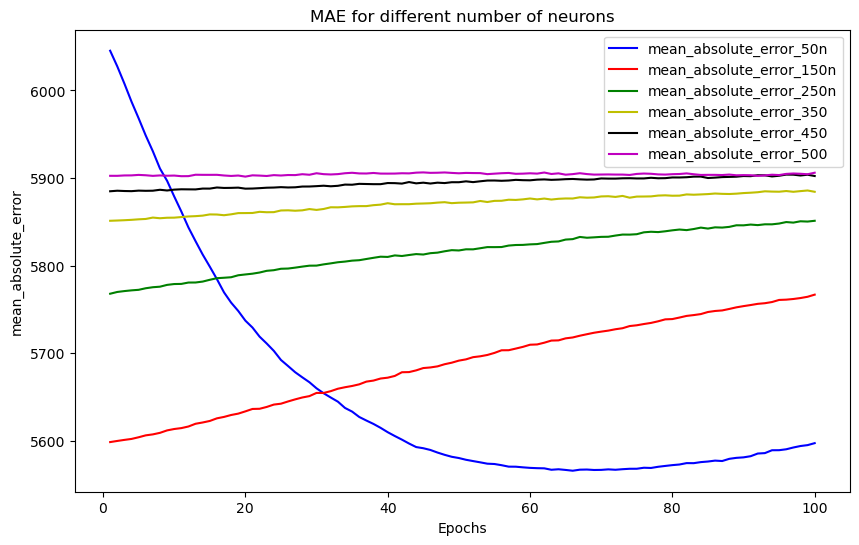

In [100]:
import matplotlib.pyplot as plt

# Get the loss values from history_1
mean_absolute_error_50n = history_h1_50n.history['mean_absolute_error']
mean_absolute_error_150n = history_h1_150n.history['mean_absolute_error']
mean_absolute_error_250n = history_h1_250n.history['mean_absolute_error']
mean_absolute_error_350n = history_h1_350n.history['mean_absolute_error']
mean_absolute_error_450n = history_h1_450n.history['mean_absolute_error']
mean_absolute_error_500n = history_h1_500n.history['mean_absolute_error']

# Increase figure size
plt.figure(figsize=(10, 6))

# Plot the training and validation loss
epochs = range(1, len(mean_absolute_error_50n) + 1)
plt.plot(epochs, mean_absolute_error_50n, 'b', label='mean_absolute_error_50n')
plt.plot(epochs, mean_absolute_error_150n, 'r', label='mean_absolute_error_150n')
plt.plot(epochs, mean_absolute_error_250n, 'g', label='mean_absolute_error_250n')
plt.plot(epochs, mean_absolute_error_350n, 'y', label='mean_absolute_error_350')
plt.plot(epochs, mean_absolute_error_450n, 'k', label='mean_absolute_error_450')
plt.plot(epochs, mean_absolute_error_500n, 'm', label='mean_absolute_error_500')
plt.title('MAE for different number of neurons')
plt.xlabel('Epochs')
plt.ylabel('mean_absolute_error')
plt.legend(loc='upper right')

plt.show()


# Result:
- The above plot shows as the number of cells in a single layer model increases, the MAE increasing through training process.
- The best choice between these 6 model is a single layer model with 50 neurons, where MAE decreases sharply untill the 70th epoch but then it rises slightly after the 70th epoch, so it's good to be carefull in choosing the number of epoch for this model.

# Models with 1 ,2, 5, and 7 hidden layers and 100 neuron in each layer.
- we make 4 model with 1, 2, 5 and 7 hidden in each one and each layer should have 100 neurons.
- Then we measure the mae metric for them and plot the rusult to see which model had a better performance.

# model_100n_1H

In [101]:
# define a model
model_100n_1H = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])

In [102]:
learning_rate = 0.001
optimizer = SGD(learning_rate=learning_rate)

model_100n_1H.compile(loss="mean_squared_error",
              optimizer=optimizer,
              metrics=["mean_absolute_error"])

In [103]:
history_100n_1H = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
5/5 [==============================] - 0s 32ms/step - loss: 61359216.0000 - mean_absolute_error: 5904.1572 - val_loss: 45641736.0000 - val_mean_absolute_error: 5305.5176
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 61362244.0000 - mean_absolute_error: 5903.9238 - val_loss: 45647612.0000 - val_mean_absolute_error: 5306.2500
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 61360092.0000 - mean_absolute_error: 5904.1865 - val_loss: 45650312.0000 - val_mean_absolute_error: 5306.5874
Epoch 4/100
5/5 [==============================] - 0s 16ms/step - loss: 61360016.0000 - mean_absolute_error: 5904.5444 - val_loss: 45647232.0000 - val_mean_absolute_error: 5306.2026
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 61359684.0000 - mean_absolute_error: 5904.4692 - val_loss: 45641840.0000 - val_mean_absolute_error: 5305.5308
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 61360196.0000 - me

Epoch 46/100
5/5 [==============================] - 0s 12ms/step - loss: 61359500.0000 - mean_absolute_error: 5905.6992 - val_loss: 45672772.0000 - val_mean_absolute_error: 5309.3809
Epoch 47/100
5/5 [==============================] - 0s 13ms/step - loss: 61358984.0000 - mean_absolute_error: 5906.0801 - val_loss: 45671100.0000 - val_mean_absolute_error: 5309.1743
Epoch 48/100
5/5 [==============================] - 0s 12ms/step - loss: 61363136.0000 - mean_absolute_error: 5905.5430 - val_loss: 45674700.0000 - val_mean_absolute_error: 5309.6211
Epoch 49/100
5/5 [==============================] - 0s 13ms/step - loss: 61361172.0000 - mean_absolute_error: 5906.4839 - val_loss: 45667688.0000 - val_mean_absolute_error: 5308.7500
Epoch 50/100
5/5 [==============================] - 0s 11ms/step - loss: 61362056.0000 - mean_absolute_error: 5904.7407 - val_loss: 45675496.0000 - val_mean_absolute_error: 5309.7192
Epoch 51/100
5/5 [==============================] - 0s 12ms/step - loss: 61361408.000

Epoch 91/100
5/5 [==============================] - 0s 12ms/step - loss: 61359000.0000 - mean_absolute_error: 5907.6963 - val_loss: 45698916.0000 - val_mean_absolute_error: 5312.6187
Epoch 92/100
5/5 [==============================] - 0s 12ms/step - loss: 61365476.0000 - mean_absolute_error: 5907.5469 - val_loss: 45694596.0000 - val_mean_absolute_error: 5312.0854
Epoch 93/100
5/5 [==============================] - 0s 12ms/step - loss: 61359132.0000 - mean_absolute_error: 5906.9761 - val_loss: 45699796.0000 - val_mean_absolute_error: 5312.7285
Epoch 94/100
5/5 [==============================] - 0s 12ms/step - loss: 61364056.0000 - mean_absolute_error: 5907.5146 - val_loss: 45698356.0000 - val_mean_absolute_error: 5312.5503
Epoch 95/100
5/5 [==============================] - 0s 12ms/step - loss: 61362016.0000 - mean_absolute_error: 5907.7388 - val_loss: 45703780.0000 - val_mean_absolute_error: 5313.2207
Epoch 96/100
5/5 [==============================] - 0s 13ms/step - loss: 61362748.000

In [104]:
print('Minimum training loss:',min(history_100n_1H.history['loss']))
print('Maximum training loss:',max(history_100n_1H.history['loss']))
print('\n')
print('Minimum validation loss:',min(history_100n_1H.history['val_loss']))
print('Maximum validation loss:',max(history_100n_1H.history['val_loss']))
print('\n')
print('Minimum Mean Absolute Error:',min(history_100n_1H.history['mean_absolute_error']))
print('Maximum Mean Absolute Error:',max(history_100n_1H.history['mean_absolute_error']))

Minimum training loss: 61358908.0
Maximum training loss: 61367624.0


Minimum validation loss: 45619436.0
Maximum validation loss: 45729556.0


Minimum Mean Squared Error: 5902.4853515625
Maximum Mean Squared Error: 5908.8896484375


# model_100n_2H

In [105]:
# define a model
model_100n_2H = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])

In [106]:
learning_rate = 0.001
optimizer = SGD(learning_rate=learning_rate)

model_100n_2H.compile(loss="mean_squared_error",
              optimizer=optimizer,
              metrics=["mean_absolute_error"])

In [107]:
history_100n_2H = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
5/5 [==============================] - 0s 31ms/step - loss: 61361996.0000 - mean_absolute_error: 5909.1416 - val_loss: 45740128.0000 - val_mean_absolute_error: 5317.6914
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 61358848.0000 - mean_absolute_error: 5910.3613 - val_loss: 45736836.0000 - val_mean_absolute_error: 5317.2881
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 61362412.0000 - mean_absolute_error: 5910.3643 - val_loss: 45733864.0000 - val_mean_absolute_error: 5316.9238
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 61361068.0000 - mean_absolute_error: 5910.0186 - val_loss: 45733888.0000 - val_mean_absolute_error: 5316.9263
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 61361760.0000 - mean_absolute_error: 5910.0488 - val_loss: 45731552.0000 - val_mean_absolute_error: 5316.6401
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 61361632.0000 - me

Epoch 46/100
5/5 [==============================] - 0s 12ms/step - loss: 61363284.0000 - mean_absolute_error: 5910.4678 - val_loss: 45721316.0000 - val_mean_absolute_error: 5315.3813
Epoch 47/100
5/5 [==============================] - 0s 13ms/step - loss: 61359020.0000 - mean_absolute_error: 5908.7192 - val_loss: 45722776.0000 - val_mean_absolute_error: 5315.5615
Epoch 48/100
5/5 [==============================] - 0s 12ms/step - loss: 61360176.0000 - mean_absolute_error: 5909.8057 - val_loss: 45717844.0000 - val_mean_absolute_error: 5314.9541
Epoch 49/100
5/5 [==============================] - 0s 12ms/step - loss: 61358928.0000 - mean_absolute_error: 5908.6265 - val_loss: 45720372.0000 - val_mean_absolute_error: 5315.2661
Epoch 50/100
5/5 [==============================] - 0s 12ms/step - loss: 61360596.0000 - mean_absolute_error: 5909.3770 - val_loss: 45722848.0000 - val_mean_absolute_error: 5315.5708
Epoch 51/100
5/5 [==============================] - 0s 13ms/step - loss: 61359960.000

Epoch 91/100
5/5 [==============================] - 0s 12ms/step - loss: 61360136.0000 - mean_absolute_error: 5908.1606 - val_loss: 45711624.0000 - val_mean_absolute_error: 5314.1880
Epoch 92/100
5/5 [==============================] - 0s 12ms/step - loss: 61359604.0000 - mean_absolute_error: 5908.4214 - val_loss: 45707756.0000 - val_mean_absolute_error: 5313.7104
Epoch 93/100
5/5 [==============================] - 0s 12ms/step - loss: 61360560.0000 - mean_absolute_error: 5907.5811 - val_loss: 45715876.0000 - val_mean_absolute_error: 5314.7114
Epoch 94/100
5/5 [==============================] - 0s 13ms/step - loss: 61359556.0000 - mean_absolute_error: 5908.7075 - val_loss: 45716176.0000 - val_mean_absolute_error: 5314.7480
Epoch 95/100
5/5 [==============================] - 0s 12ms/step - loss: 61359932.0000 - mean_absolute_error: 5909.0889 - val_loss: 45713900.0000 - val_mean_absolute_error: 5314.4692
Epoch 96/100
5/5 [==============================] - 0s 11ms/step - loss: 61363520.000

In [108]:
print('Minimum training loss:',min(history_100n_2H.history['loss']))
print('Maximum training loss:',max(history_100n_2H.history['loss']))
print('\n')
print('Minimum validation loss:',min(history_100n_2H.history['val_loss']))
print('Maximum validation loss:',max(history_100n_2H.history['val_loss']))
print('\n')
print('Minimum Mean Absolute Error:',min(history_100n_2H.history['mean_absolute_error']))
print('Maximum Mean Absolute Error:',max(history_100n_2H.history['mean_absolute_error']))

Minimum training loss: 61358392.0
Maximum training loss: 61369420.0


Minimum validation loss: 45685328.0
Maximum validation loss: 45758744.0


Minimum Mean Squared Error: 5906.5458984375
Maximum Mean Squared Error: 5911.89990234375


# model_100n_5H

In [109]:
# define a model
model_100n_5H = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])

In [110]:
learning_rate = 0.001
optimizer = SGD(learning_rate=learning_rate)

model_100n_5H.compile(loss="mean_squared_error",
              optimizer=optimizer,
              metrics=["mean_absolute_error"])

In [111]:
history_100n_5H = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
5/5 [==============================] - 0s 30ms/step - loss: 61364580.0000 - mean_absolute_error: 5908.3364 - val_loss: 45720788.0000 - val_mean_absolute_error: 5315.3164
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 61362328.0000 - mean_absolute_error: 5909.2739 - val_loss: 45713560.0000 - val_mean_absolute_error: 5314.4258
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 61360156.0000 - mean_absolute_error: 5908.4746 - val_loss: 45719144.0000 - val_mean_absolute_error: 5315.1147
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 61361932.0000 - mean_absolute_error: 5909.2583 - val_loss: 45718096.0000 - val_mean_absolute_error: 5314.9849
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 61370516.0000 - mean_absolute_error: 5909.2275 - val_loss: 45716352.0000 - val_mean_absolute_error: 5314.7695
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 61362852.0000 - me

Epoch 46/100
5/5 [==============================] - 0s 13ms/step - loss: 61359800.0000 - mean_absolute_error: 5907.1890 - val_loss: 45707848.0000 - val_mean_absolute_error: 5313.7217
Epoch 47/100
5/5 [==============================] - 0s 12ms/step - loss: 61359696.0000 - mean_absolute_error: 5908.2505 - val_loss: 45702324.0000 - val_mean_absolute_error: 5313.0396
Epoch 48/100
5/5 [==============================] - 0s 12ms/step - loss: 61363696.0000 - mean_absolute_error: 5907.7949 - val_loss: 45705060.0000 - val_mean_absolute_error: 5313.3779
Epoch 49/100
5/5 [==============================] - 0s 13ms/step - loss: 61360036.0000 - mean_absolute_error: 5907.9868 - val_loss: 45708516.0000 - val_mean_absolute_error: 5313.8042
Epoch 50/100
5/5 [==============================] - 0s 11ms/step - loss: 61360100.0000 - mean_absolute_error: 5908.3374 - val_loss: 45701820.0000 - val_mean_absolute_error: 5312.9785
Epoch 51/100
5/5 [==============================] - 0s 12ms/step - loss: 61363080.000

Epoch 91/100
5/5 [==============================] - 0s 12ms/step - loss: 61359140.0000 - mean_absolute_error: 5906.9194 - val_loss: 45679672.0000 - val_mean_absolute_error: 5310.2378
Epoch 92/100
5/5 [==============================] - 0s 12ms/step - loss: 61361912.0000 - mean_absolute_error: 5906.9790 - val_loss: 45680820.0000 - val_mean_absolute_error: 5310.3794
Epoch 93/100
5/5 [==============================] - 0s 12ms/step - loss: 61361508.0000 - mean_absolute_error: 5906.1465 - val_loss: 45677384.0000 - val_mean_absolute_error: 5309.9536
Epoch 94/100
5/5 [==============================] - 0s 12ms/step - loss: 61358740.0000 - mean_absolute_error: 5906.3525 - val_loss: 45673444.0000 - val_mean_absolute_error: 5309.4648
Epoch 95/100
5/5 [==============================] - 0s 12ms/step - loss: 61364072.0000 - mean_absolute_error: 5905.8770 - val_loss: 45677408.0000 - val_mean_absolute_error: 5309.9570
Epoch 96/100
5/5 [==============================] - 0s 12ms/step - loss: 61365504.000

In [112]:
print('Minimum training loss:',min(history_100n_5H.history['loss']))
print('Maximum training loss:',max(history_100n_5H.history['loss']))
print('\n')
print('Minimum validation loss:',min(history_100n_5H.history['val_loss']))
print('Maximum validation loss:',max(history_100n_5H.history['val_loss']))
print('\n')
print('Minimum Mean Absolute Error:',min(history_100n_5H.history['mean_absolute_error']))
print('Maximum Mean Absolute Error:',max(history_100n_5H.history['mean_absolute_error']))

Minimum training loss: 61358444.0
Maximum training loss: 61370624.0


Minimum validation loss: 45673444.0
Maximum validation loss: 45722276.0


Minimum Mean Squared Error: 5905.876953125
Maximum Mean Squared Error: 5909.3623046875


# model_100n_7H

In [113]:
model_100n_7H = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])

In [114]:
learning_rate = 0.001
optimizer = SGD(learning_rate=learning_rate)

model_100n_7H.compile(loss="mean_squared_error",
              optimizer=optimizer,
              metrics=["mean_absolute_error"])

In [115]:
history_100n_7H = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
5/5 [==============================] - 0s 29ms/step - loss: 61359224.0000 - mean_absolute_error: 5906.9590 - val_loss: 45688976.0000 - val_mean_absolute_error: 5311.3906
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 61359376.0000 - mean_absolute_error: 5906.6855 - val_loss: 45689424.0000 - val_mean_absolute_error: 5311.4468
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 61361464.0000 - mean_absolute_error: 5906.5454 - val_loss: 45692400.0000 - val_mean_absolute_error: 5311.8135
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 61361800.0000 - mean_absolute_error: 5907.2759 - val_loss: 45686640.0000 - val_mean_absolute_error: 5311.1021
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 61365756.0000 - mean_absolute_error: 5906.9766 - val_loss: 45685504.0000 - val_mean_absolute_error: 5310.9595
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 61359800.0000 - me

Epoch 46/100
5/5 [==============================] - 0s 13ms/step - loss: 61362900.0000 - mean_absolute_error: 5907.1777 - val_loss: 45689956.0000 - val_mean_absolute_error: 5311.5112
Epoch 47/100
5/5 [==============================] - 0s 12ms/step - loss: 61359092.0000 - mean_absolute_error: 5906.9731 - val_loss: 45693116.0000 - val_mean_absolute_error: 5311.9038
Epoch 48/100
5/5 [==============================] - 0s 12ms/step - loss: 61359780.0000 - mean_absolute_error: 5906.9160 - val_loss: 45699888.0000 - val_mean_absolute_error: 5312.7402
Epoch 49/100
5/5 [==============================] - 0s 12ms/step - loss: 61359912.0000 - mean_absolute_error: 5907.3198 - val_loss: 45699564.0000 - val_mean_absolute_error: 5312.7007
Epoch 50/100
5/5 [==============================] - 0s 13ms/step - loss: 61360492.0000 - mean_absolute_error: 5907.8179 - val_loss: 45704292.0000 - val_mean_absolute_error: 5313.2837
Epoch 51/100
5/5 [==============================] - 0s 11ms/step - loss: 61359520.000

Epoch 91/100
5/5 [==============================] - 0s 12ms/step - loss: 61359012.0000 - mean_absolute_error: 5908.1055 - val_loss: 45703940.0000 - val_mean_absolute_error: 5313.2397
Epoch 92/100
5/5 [==============================] - 0s 12ms/step - loss: 61361244.0000 - mean_absolute_error: 5907.4883 - val_loss: 45710372.0000 - val_mean_absolute_error: 5314.0337
Epoch 93/100
5/5 [==============================] - 0s 12ms/step - loss: 61361160.0000 - mean_absolute_error: 5907.7407 - val_loss: 45719132.0000 - val_mean_absolute_error: 5315.1123
Epoch 94/100
5/5 [==============================] - 0s 12ms/step - loss: 61358956.0000 - mean_absolute_error: 5908.9023 - val_loss: 45719828.0000 - val_mean_absolute_error: 5315.1987
Epoch 95/100
5/5 [==============================] - 0s 13ms/step - loss: 61361980.0000 - mean_absolute_error: 5908.3945 - val_loss: 45723388.0000 - val_mean_absolute_error: 5315.6353
Epoch 96/100
5/5 [==============================] - 0s 12ms/step - loss: 61361516.000

In [116]:
print('Minimum training loss:',min(history_100n_7H.history['loss']))
print('Maximum training loss:',max(history_100n_7H.history['loss']))
print('\n')
print('Minimum validation loss:',min(history_100n_7H.history['val_loss']))
print('Maximum validation loss:',max(history_100n_7H.history['val_loss']))
print('\n')
print('Minimum Mean Absolute Error:',min(history_100n_7H.history['mean_absolute_error']))
print('Maximum Mean Absolute Error:',max(history_100n_7H.history['mean_absolute_error']))

Minimum training loss: 61358232.0
Maximum training loss: 61367260.0


Minimum validation loss: 45675520.0
Maximum validation loss: 45723692.0


Minimum Mean Squared Error: 5905.87255859375
Maximum Mean Squared Error: 5909.79150390625


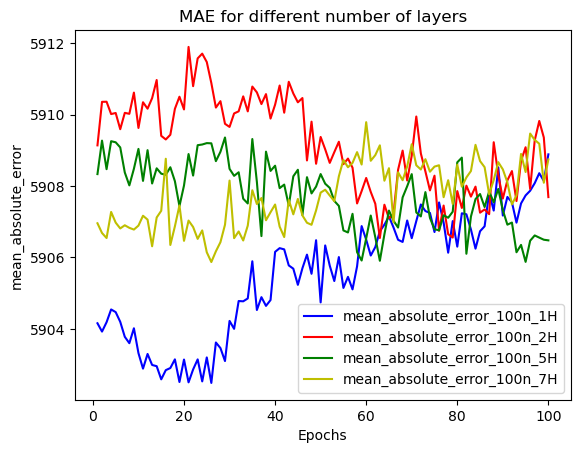

In [118]:
# Get the loss values from history_1
mean_absolute_error_100n_1H = history_100n_1H.history['mean_absolute_error']
mean_absolute_error_100n_2H  = history_100n_2H.history['mean_absolute_error']
mean_absolute_error_100n_5H  = history_100n_5H.history['mean_absolute_error']
mean_absolute_error_100n_7H  = history_100n_7H.history['mean_absolute_error']


# Plot the training and validation loss
epochs = range(1, len(mean_absolute_error_100n_1H) + 1)
plt.plot(epochs, mean_absolute_error_100n_1H, 'b', label='mean_absolute_error_100n_1H')
plt.plot(epochs, mean_absolute_error_100n_2H, 'r', label='mean_absolute_error_100n_2H')
plt.plot(epochs, mean_absolute_error_100n_5H, 'g', label='mean_absolute_error_100n_5H')
plt.plot(epochs, mean_absolute_error_100n_7H, 'y', label='mean_absolute_error_100n_7H')

plt.title('MAE for different number of layers')
plt.xlabel('Epochs')
plt.ylabel('mean_absolute_error')
plt.legend()
plt.show()


# Result:
- Overall we can say that 1 hidden layer model, by far had the best result for MAE among the other models but just before 60 epochs of training. However 1 layer modle converged with other models at 90th epoch and we can increase the number of epochs to see if the more dense models can perform better thatn single layer model.

In [119]:
X_train.shape

(147, 191)

In [120]:
y_train.shape

(147,)

In [364]:
input_shape = (191,)

# Create the input layer
inputs = keras.Input(shape=input_shape)

# Build the wide component
wide_layer = layers.Dense(64, activation='relu')(inputs)
wide_layer = layers.Dense(32, activation='relu')(wide_layer)
# Build the deep component
deep_layer = layers.Dense(128, activation='relu')(inputs)
deep_layer = layers.Dense(128, activation='relu')(deep_layer)
deep_layer = layers.Dense(64, activation='relu')(deep_layer)
deep_layer = layers.Dense(64, activation='relu')(deep_layer)
deep_layer = layers.Dense(64, activation='relu')(deep_layer)
deep_layer = layers.Dense(32, activation='relu')(deep_layer)
deep_layer = layers.Dense(10, activation='relu')(deep_layer)


# Concatenate the wide and deep components
concatenated = layers.concatenate([wide_layer, deep_layer])

# Add additional layers as needed
output_layer = layers.Dense(1)(concatenated)

# Create the model
model = keras.Model(inputs=inputs, outputs=output_layer)

# Compile the model
learning_rate = 0.001
optimizer = SGD(learning_rate=learning_rate)
model.compile(optimizer= optimizer, loss="mean_squared_error", metrics=["mean_absolute_error"])

# Train the model
history_WD= model.fit(X_train, y_train, epochs=100,
          validation_data=(X_val, y_val))


Epoch 1/100
5/5 [==============================] - 1s 85ms/step - loss: 6759991808.0000 - mean_absolute_error: 45964.8242 - val_loss: 187051856.0000 - val_mean_absolute_error: 12002.9600
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 246473072.0000 - mean_absolute_error: 13604.1719 - val_loss: 183821888.0000 - val_mean_absolute_error: 11867.6475
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 242824928.0000 - mean_absolute_error: 13468.1357 - val_loss: 180672400.0000 - val_mean_absolute_error: 11734.2051
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 239262992.0000 - mean_absolute_error: 13337.2764 - val_loss: 177602064.0000 - val_mean_absolute_error: 11602.6387
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 235783488.0000 - mean_absolute_error: 13206.9131 - val_loss: 174586992.0000 - val_mean_absolute_error: 11471.9727
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - los

Epoch 90/100
5/5 [==============================] - 0s 13ms/step - loss: 93025304.0000 - mean_absolute_error: 6188.8657 - val_loss: 58499448.0000 - val_mean_absolute_error: 4693.9155
Epoch 91/100
5/5 [==============================] - 0s 15ms/step - loss: 92405544.0000 - mean_absolute_error: 6160.2603 - val_loss: 58077884.0000 - val_mean_absolute_error: 4679.9478
Epoch 92/100
5/5 [==============================] - 0s 14ms/step - loss: 91804184.0000 - mean_absolute_error: 6133.7354 - val_loss: 57661036.0000 - val_mean_absolute_error: 4665.9429
Epoch 93/100
5/5 [==============================] - 0s 13ms/step - loss: 91212848.0000 - mean_absolute_error: 6107.6938 - val_loss: 57249424.0000 - val_mean_absolute_error: 4651.9185
Epoch 94/100
5/5 [==============================] - 0s 14ms/step - loss: 90624952.0000 - mean_absolute_error: 6087.3086 - val_loss: 56833552.0000 - val_mean_absolute_error: 4637.5410
Epoch 95/100
5/5 [==============================] - 0s 13ms/step - loss: 90033784.000

In [367]:
print('Minimum training loss:',min(history_WD.history['loss']))
print('Maximum training loss:',max(history_WD.history['loss']))
print('\n')
print('Minimum validation loss:',min(history_WD.history['val_loss']))
print('Maximum validation loss:',max(history_WD.history['val_loss']))
print('\n')
print('Minimum Mean Absolute Error:',min(history_WD.history['mean_absolute_error']))
print('Maximum Mean Absolute Error:',max(history_WD.history['mean_absolute_error']))

Minimum training loss: 87327336.0
Maximum training loss: 6759991808.0


Minimum validation loss: 54617780.0
Maximum validation loss: 187051856.0


Minimum Mean Absolute Error: 5964.8798828125
Maximum Mean Absolute Error: 45964.82421875


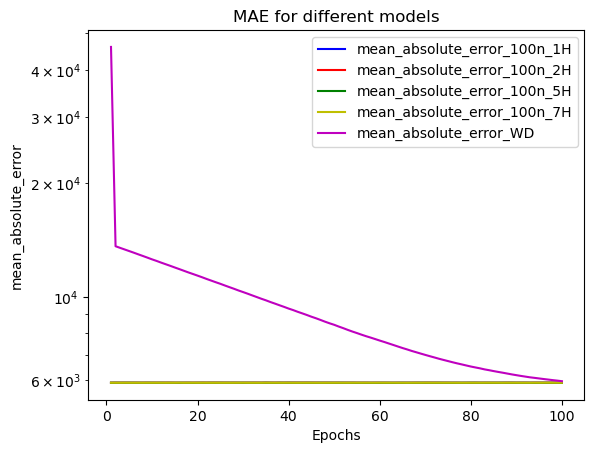

In [368]:
# Get the loss values from history_1
mean_absolute_error_100n_1H = history_100n_1H.history['mean_absolute_error']
mean_absolute_error_100n_2H  = history_100n_2H.history['mean_absolute_error']
mean_absolute_error_100n_5H  = history_100n_5H.history['mean_absolute_error']
mean_absolute_error_100n_7H  = history_100n_7H.history['mean_absolute_error']
mean_absolute_error_WD = history_WD.history['mean_absolute_error']

# Plot the training and validation loss
epochs = range(1, len(mean_absolute_error_100n_1H) + 1)
plt.plot(epochs, mean_absolute_error_100n_1H, 'b', label='mean_absolute_error_100n_1H')
plt.plot(epochs, mean_absolute_error_100n_2H, 'r', label='mean_absolute_error_100n_2H')
plt.plot(epochs, mean_absolute_error_100n_5H, 'g', label='mean_absolute_error_100n_5H')
plt.plot(epochs, mean_absolute_error_100n_7H, 'y', label='mean_absolute_error_100n_7H')
plt.plot(epochs, mean_absolute_error_WD, 'm', label='mean_absolute_error_WD')

plt.title('MAE for different models')
plt.xlabel('Epochs')
plt.ylabel('mean_absolute_error')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.legend()
plt.show()


# Result:
- Using wide and deep model showed that simple models have better performance compared to wide and deep. Beside that training the wide and deep model was so cumbersome and most of times modle was collaping and I should change the model's architecture.

# Since my Wide and Deep model didn't work as I wished I tried cross validation.

- In our data we had several columns which had several unique values and some of them had the frequency of one. 
- In such situations model is volnurable an could overfitt. So crossvalidation is a good idea to diminish this effect.
- Increasing the number of splits might make our model's performance better.

In [384]:
# this is a sample of columns that have single unique values inside of them. forinstance we can see many car names just 
# appeared one time in our data.
print(df['CarName'].value_counts())

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64


In [374]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (191,)

# Create the input layer
inputs = keras.Input(shape=input_shape)

# Build the wide component
wide_layer = layers.Dense(64, activation='relu')(inputs)
wide_layer = layers.Dense(32, activation='relu')(wide_layer)

# Build the deep component
deep_layer = layers.Dense(128, activation='relu')(inputs)
deep_layer = layers.Dense(128, activation='relu')(wide_layer)
deep_layer = layers.Dense(64, activation='relu')(deep_layer)
deep_layer = layers.Dense(64, activation='relu')(wide_layer)
deep_layer = layers.Dense(64, activation='relu')(wide_layer)
deep_layer = layers.Dense(32, activation='relu')(deep_layer)
deep_layer = layers.Dense(10, activation='relu')(wide_layer)

# Concatenate the wide and deep components
concatenated = layers.concatenate([wide_layer, deep_layer])

# Add additional layers as needed
output_layer = layers.Dense(1)(concatenated)

# Create the model
model = keras.Model(inputs=inputs, outputs=output_layer)

# Compile the model
learning_rate = 0.001
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["mean_absolute_error"])

# Define the number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits)

# Reset the index of y_train
y_train = y_train.reset_index(drop=True)

# Initialize a list to store the training history of each fold
history_list = []

# Perform cross-validation
fold = 1
for train_index, val_index in kf.split(X_train):
    print(f"Fold: {fold}")
    
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Train the model on the current fold and store the history
    history_wd = model.fit(X_train_fold, y_train_fold, epochs=100, validation_data=(X_val_fold, y_val_fold))
    

    
    fold += 1


Fold: 1
Epoch 1/100
4/4 [==============================] - 1s 92ms/step - loss: 363425056.0000 - mean_absolute_error: 15915.2861 - val_loss: 262098080.0000 - val_mean_absolute_error: 13517.6396
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 234598704.0000 - mean_absolute_error: 13332.5391 - val_loss: 259284048.0000 - val_mean_absolute_error: 13413.1504
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 231813728.0000 - mean_absolute_error: 13230.8604 - val_loss: 256464624.0000 - val_mean_absolute_error: 13307.6348
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 229040416.0000 - mean_absolute_error: 13125.6553 - val_loss: 253679376.0000 - val_mean_absolute_error: 13202.5742
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 226293088.0000 - mean_absolute_error: 13022.0596 - val_loss: 250913456.0000 - val_mean_absolute_error: 13097.4053
Epoch 6/100
4/4 [==============================] - 0s 18ms/ste

Epoch 45/100
4/4 [==============================] - 0s 17ms/step - loss: 146088640.0000 - mean_absolute_error: 9454.4619 - val_loss: 170533408.0000 - val_mean_absolute_error: 9547.8760
Epoch 46/100
4/4 [==============================] - 0s 15ms/step - loss: 144666976.0000 - mean_absolute_error: 9376.0469 - val_loss: 169134688.0000 - val_mean_absolute_error: 9474.3467
Epoch 47/100
4/4 [==============================] - 0s 17ms/step - loss: 143290784.0000 - mean_absolute_error: 9303.7080 - val_loss: 167720160.0000 - val_mean_absolute_error: 9399.3994
Epoch 48/100
4/4 [==============================] - 0s 15ms/step - loss: 141905376.0000 - mean_absolute_error: 9229.3164 - val_loss: 166334784.0000 - val_mean_absolute_error: 9325.4121
Epoch 49/100
4/4 [==============================] - 0s 15ms/step - loss: 140549712.0000 - mean_absolute_error: 9154.1572 - val_loss: 164981280.0000 - val_mean_absolute_error: 9252.5576
Epoch 50/100
4/4 [==============================] - 0s 16ms/step - loss: 13

Epoch 34/100
4/4 [==============================] - 0s 15ms/step - loss: 85359832.0000 - mean_absolute_error: 5782.2646 - val_loss: 75144928.0000 - val_mean_absolute_error: 5963.3452
Epoch 35/100
4/4 [==============================] - 0s 15ms/step - loss: 85022848.0000 - mean_absolute_error: 5772.4028 - val_loss: 74776880.0000 - val_mean_absolute_error: 5943.6025
Epoch 36/100
4/4 [==============================] - 0s 15ms/step - loss: 84690664.0000 - mean_absolute_error: 5761.9360 - val_loss: 74427552.0000 - val_mean_absolute_error: 5924.7271
Epoch 37/100
4/4 [==============================] - 0s 15ms/step - loss: 84370232.0000 - mean_absolute_error: 5753.1611 - val_loss: 74080856.0000 - val_mean_absolute_error: 5905.8584
Epoch 38/100
4/4 [==============================] - 0s 15ms/step - loss: 84059032.0000 - mean_absolute_error: 5743.8345 - val_loss: 73743904.0000 - val_mean_absolute_error: 5887.3877
Epoch 39/100
4/4 [==============================] - 0s 18ms/step - loss: 83746448.000

Epoch 79/100
4/4 [==============================] - 0s 16ms/step - loss: 74458664.0000 - mean_absolute_error: 5623.6665 - val_loss: 63213364.0000 - val_mean_absolute_error: 5415.6987
Epoch 80/100
4/4 [==============================] - 0s 21ms/step - loss: 74292160.0000 - mean_absolute_error: 5623.5781 - val_loss: 63032336.0000 - val_mean_absolute_error: 5408.9722
Epoch 81/100
4/4 [==============================] - 0s 20ms/step - loss: 74132552.0000 - mean_absolute_error: 5623.9214 - val_loss: 62856612.0000 - val_mean_absolute_error: 5402.3970
Epoch 82/100
4/4 [==============================] - 0s 17ms/step - loss: 73980640.0000 - mean_absolute_error: 5624.4297 - val_loss: 62670324.0000 - val_mean_absolute_error: 5395.3760
Epoch 83/100
4/4 [==============================] - 0s 19ms/step - loss: 73817448.0000 - mean_absolute_error: 5623.0820 - val_loss: 62502988.0000 - val_mean_absolute_error: 5390.1689
Epoch 84/100
4/4 [==============================] - 0s 19ms/step - loss: 73668632.000

Epoch 24/100
4/4 [==============================] - 0s 15ms/step - loss: 72808544.0000 - mean_absolute_error: 5754.2881 - val_loss: 41663912.0000 - val_mean_absolute_error: 4842.0229
Epoch 25/100
4/4 [==============================] - 0s 15ms/step - loss: 72712160.0000 - mean_absolute_error: 5755.8887 - val_loss: 41576560.0000 - val_mean_absolute_error: 4838.4302
Epoch 26/100
4/4 [==============================] - 0s 16ms/step - loss: 72614008.0000 - mean_absolute_error: 5758.4004 - val_loss: 41494492.0000 - val_mean_absolute_error: 4835.0215
Epoch 27/100
4/4 [==============================] - 0s 21ms/step - loss: 72524632.0000 - mean_absolute_error: 5759.7876 - val_loss: 41421024.0000 - val_mean_absolute_error: 4831.9419
Epoch 28/100
4/4 [==============================] - 0s 20ms/step - loss: 72444256.0000 - mean_absolute_error: 5762.0435 - val_loss: 41342312.0000 - val_mean_absolute_error: 4828.6128
Epoch 29/100
4/4 [==============================] - 0s 20ms/step - loss: 72354664.000

Epoch 69/100
4/4 [==============================] - 0s 17ms/step - loss: 69956056.0000 - mean_absolute_error: 5842.0933 - val_loss: 39181416.0000 - val_mean_absolute_error: 4789.5439
Epoch 70/100
4/4 [==============================] - 0s 18ms/step - loss: 69922888.0000 - mean_absolute_error: 5843.8311 - val_loss: 39147908.0000 - val_mean_absolute_error: 4789.9595
Epoch 71/100
4/4 [==============================] - 0s 19ms/step - loss: 69877024.0000 - mean_absolute_error: 5845.3550 - val_loss: 39113156.0000 - val_mean_absolute_error: 4790.3940
Epoch 72/100
4/4 [==============================] - 0s 18ms/step - loss: 69842784.0000 - mean_absolute_error: 5848.2778 - val_loss: 39080072.0000 - val_mean_absolute_error: 4790.8110
Epoch 73/100
4/4 [==============================] - 0s 15ms/step - loss: 69798400.0000 - mean_absolute_error: 5849.5522 - val_loss: 39047528.0000 - val_mean_absolute_error: 4791.2251
Epoch 74/100
4/4 [==============================] - 0s 16ms/step - loss: 69760904.000

Epoch 14/100
4/4 [==============================] - 0s 15ms/step - loss: 61056192.0000 - mean_absolute_error: 5605.4004 - val_loss: 68738240.0000 - val_mean_absolute_error: 6101.9482
Epoch 15/100
4/4 [==============================] - 0s 16ms/step - loss: 61034748.0000 - mean_absolute_error: 5608.7500 - val_loss: 68722600.0000 - val_mean_absolute_error: 6102.1987
Epoch 16/100
4/4 [==============================] - 0s 16ms/step - loss: 61020212.0000 - mean_absolute_error: 5609.2021 - val_loss: 68705568.0000 - val_mean_absolute_error: 6102.4731
Epoch 17/100
4/4 [==============================] - 0s 15ms/step - loss: 60998108.0000 - mean_absolute_error: 5610.1367 - val_loss: 68687120.0000 - val_mean_absolute_error: 6102.7739
Epoch 18/100
4/4 [==============================] - 0s 15ms/step - loss: 60978716.0000 - mean_absolute_error: 5611.9678 - val_loss: 68668384.0000 - val_mean_absolute_error: 6103.0815
Epoch 19/100
4/4 [==============================] - 0s 16ms/step - loss: 60961964.000

Epoch 59/100
4/4 [==============================] - 0s 15ms/step - loss: 60442940.0000 - mean_absolute_error: 5667.2300 - val_loss: 68131976.0000 - val_mean_absolute_error: 6129.4468
Epoch 60/100
4/4 [==============================] - 0s 16ms/step - loss: 60421204.0000 - mean_absolute_error: 5669.9331 - val_loss: 68125208.0000 - val_mean_absolute_error: 6129.9160
Epoch 61/100
4/4 [==============================] - 0s 16ms/step - loss: 60415056.0000 - mean_absolute_error: 5670.7231 - val_loss: 68119064.0000 - val_mean_absolute_error: 6130.3447
Epoch 62/100
4/4 [==============================] - 0s 16ms/step - loss: 60406784.0000 - mean_absolute_error: 5670.5688 - val_loss: 68106768.0000 - val_mean_absolute_error: 6131.2100
Epoch 63/100
4/4 [==============================] - 0s 15ms/step - loss: 60392044.0000 - mean_absolute_error: 5672.3462 - val_loss: 68098496.0000 - val_mean_absolute_error: 6131.7983
Epoch 64/100
4/4 [==============================] - 0s 16ms/step - loss: 60382976.000

Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 59099872.0000 - mean_absolute_error: 5614.6860 - val_loss: 71979152.0000 - val_mean_absolute_error: 6562.5679
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 59093256.0000 - mean_absolute_error: 5615.3174 - val_loss: 71977280.0000 - val_mean_absolute_error: 6563.6582
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 59088224.0000 - mean_absolute_error: 5615.8589 - val_loss: 71975064.0000 - val_mean_absolute_error: 6564.9644
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 59083900.0000 - mean_absolute_error: 5616.3828 - val_loss: 71972240.0000 - val_mean_absolute_error: 6566.6636
Epoch 8/100
4/4 [==============================] - 0s 16ms/step - loss: 59077068.0000 - mean_absolute_error: 5617.1929 - val_loss: 71969536.0000 - val_mean_absolute_error: 6568.3286
Epoch 9/100
4/4 [==============================] - 0s 15ms/step - loss: 59075664.0000 - me

Epoch 49/100
4/4 [==============================] - 0s 16ms/step - loss: 58920804.0000 - mean_absolute_error: 5643.5479 - val_loss: 71914904.0000 - val_mean_absolute_error: 6618.4014
Epoch 50/100
4/4 [==============================] - 0s 16ms/step - loss: 58912928.0000 - mean_absolute_error: 5644.8589 - val_loss: 71914360.0000 - val_mean_absolute_error: 6619.3574
Epoch 51/100
4/4 [==============================] - 0s 15ms/step - loss: 58911912.0000 - mean_absolute_error: 5645.1138 - val_loss: 71913880.0000 - val_mean_absolute_error: 6620.2534
Epoch 52/100
4/4 [==============================] - 0s 16ms/step - loss: 58909384.0000 - mean_absolute_error: 5645.7266 - val_loss: 71913392.0000 - val_mean_absolute_error: 6621.1680
Epoch 53/100
4/4 [==============================] - 0s 16ms/step - loss: 58906000.0000 - mean_absolute_error: 5646.2891 - val_loss: 71912976.0000 - val_mean_absolute_error: 6622.0107
Epoch 54/100
4/4 [==============================] - 0s 15ms/step - loss: 58903420.000

Epoch 94/100
4/4 [==============================] - 0s 16ms/step - loss: 58838648.0000 - mean_absolute_error: 5663.6069 - val_loss: 71907520.0000 - val_mean_absolute_error: 6652.6865
Epoch 95/100
4/4 [==============================] - 0s 15ms/step - loss: 58835360.0000 - mean_absolute_error: 5663.7544 - val_loss: 71907600.0000 - val_mean_absolute_error: 6653.1875
Epoch 96/100
4/4 [==============================] - 0s 15ms/step - loss: 58835164.0000 - mean_absolute_error: 5663.3931 - val_loss: 71907792.0000 - val_mean_absolute_error: 6654.3584
Epoch 97/100
4/4 [==============================] - 0s 15ms/step - loss: 58833492.0000 - mean_absolute_error: 5664.4561 - val_loss: 71907936.0000 - val_mean_absolute_error: 6655.2061
Epoch 98/100
4/4 [==============================] - 0s 15ms/step - loss: 58832380.0000 - mean_absolute_error: 5665.4604 - val_loss: 71908040.0000 - val_mean_absolute_error: 6655.6958
Epoch 99/100
4/4 [==============================] - 0s 15ms/step - loss: 58831676.000

In [375]:
print('Minimum training loss:',min(history_wd.history['loss']))
print('Maximum training loss:',max(history_wd.history['loss']))
print('\n')
print('Minimum validation loss:',min(history_wd.history['val_loss']))
print('Maximum validation loss:',max(history_wd.history['val_loss']))
print('\n')
print('Minimum Mean Absolute Error:',min(history_wd.history['mean_absolute_error']))
print('Maximum Mean Absolute Error:',max(history_wd.history['mean_absolute_error']))

Minimum training loss: 58831064.0
Maximum training loss: 59113724.0


Minimum validation loss: 71907040.0
Maximum validation loss: 71986336.0


Minimum Mean Absolute Error: 5613.10498046875
Maximum Mean Absolute Error: 5665.47509765625


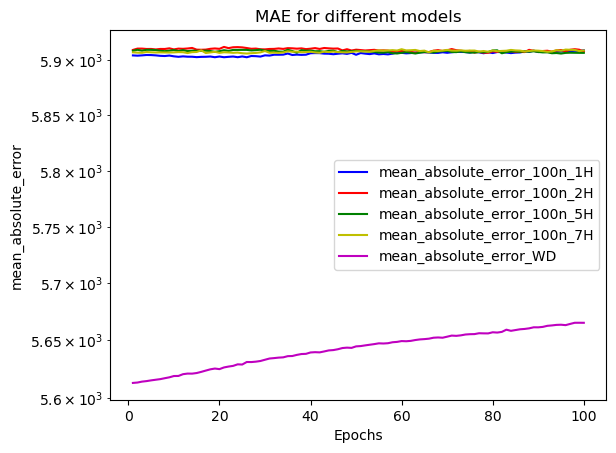

In [377]:
# Get the loss values from history_1
mean_absolute_error_100n_1H = history_100n_1H.history['mean_absolute_error']
mean_absolute_error_100n_2H  = history_100n_2H.history['mean_absolute_error']
mean_absolute_error_100n_5H  = history_100n_5H.history['mean_absolute_error']
mean_absolute_error_100n_7H  = history_100n_7H.history['mean_absolute_error']
mean_absolute_error_wd = history_wd.history['mean_absolute_error']

# Plot the training and validation loss
epochs = range(1, len(mean_absolute_error_100n_1H) + 1)
plt.plot(epochs, mean_absolute_error_100n_1H, 'b', label='mean_absolute_error_100n_1H')
plt.plot(epochs, mean_absolute_error_100n_2H, 'r', label='mean_absolute_error_100n_2H')
plt.plot(epochs, mean_absolute_error_100n_5H, 'g', label='mean_absolute_error_100n_5H')
plt.plot(epochs, mean_absolute_error_100n_7H, 'y', label='mean_absolute_error_100n_7H')
plt.plot(epochs, mean_absolute_error_wd, 'm', label='mean_absolute_error_WD')

plt.title('MAE for different models')
plt.xlabel('Epochs')
plt.ylabel('mean_absolute_error')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.legend()
plt.show()

In [378]:
# define a model
model_100n_1H = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])

# compile model
learning_rate = 0.001
optimizer = SGD(learning_rate=learning_rate)

model_100n_1H.compile(loss="mean_squared_error",
              optimizer=optimizer,
              metrics=["mean_absolute_error"])


# Define the number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits)

# Reset the index of y_train
y_train = y_train.reset_index(drop=True)

# Initialize a list to store the training history of each fold
history_list = []

# Perform cross-validation
fold = 1
for train_index, val_index in kf.split(X_train):
    print(f"Fold: {fold}")
    
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Train the model on the current fold and store the history
    history_100n_1H_CV = model.fit(X_train_fold, y_train_fold, epochs=100, validation_data=(X_val_fold, y_val_fold))
    

    
    fold += 1


Fold: 1
Epoch 1/100
4/4 [==============================] - 0s 40ms/step - loss: 56774688.0000 - mean_absolute_error: 5754.0679 - val_loss: 79485904.0000 - val_mean_absolute_error: 6282.0884
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 56774404.0000 - mean_absolute_error: 5753.9072 - val_loss: 79485776.0000 - val_mean_absolute_error: 6282.1699
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 56772196.0000 - mean_absolute_error: 5753.5737 - val_loss: 79484840.0000 - val_mean_absolute_error: 6282.7231
Epoch 4/100
4/4 [==============================] - 0s 20ms/step - loss: 56772276.0000 - mean_absolute_error: 5753.9087 - val_loss: 79483536.0000 - val_mean_absolute_error: 6283.4995
Epoch 5/100
4/4 [==============================] - 0s 20ms/step - loss: 56774392.0000 - mean_absolute_error: 5754.0117 - val_loss: 79481640.0000 - val_mean_absolute_error: 6284.6294
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 56776276.0

Epoch 46/100
4/4 [==============================] - 0s 20ms/step - loss: 56757652.0000 - mean_absolute_error: 5761.4229 - val_loss: 79456512.0000 - val_mean_absolute_error: 6300.7573
Epoch 47/100
4/4 [==============================] - 0s 21ms/step - loss: 56757348.0000 - mean_absolute_error: 5761.0547 - val_loss: 79455128.0000 - val_mean_absolute_error: 6301.7056
Epoch 48/100
4/4 [==============================] - 0s 22ms/step - loss: 56756280.0000 - mean_absolute_error: 5761.7446 - val_loss: 79454624.0000 - val_mean_absolute_error: 6302.0571
Epoch 49/100
4/4 [==============================] - 0s 16ms/step - loss: 56757824.0000 - mean_absolute_error: 5761.7671 - val_loss: 79453648.0000 - val_mean_absolute_error: 6302.7388
Epoch 50/100
4/4 [==============================] - 0s 15ms/step - loss: 56755332.0000 - mean_absolute_error: 5762.2388 - val_loss: 79453464.0000 - val_mean_absolute_error: 6302.8652
Epoch 51/100
4/4 [==============================] - 0s 15ms/step - loss: 56763424.000

Epoch 91/100
4/4 [==============================] - 0s 21ms/step - loss: 56748360.0000 - mean_absolute_error: 5769.6597 - val_loss: 79430624.0000 - val_mean_absolute_error: 6320.1230
Epoch 92/100
4/4 [==============================] - 0s 18ms/step - loss: 56748108.0000 - mean_absolute_error: 5768.8540 - val_loss: 79429144.0000 - val_mean_absolute_error: 6321.3325
Epoch 93/100
4/4 [==============================] - 0s 15ms/step - loss: 56745012.0000 - mean_absolute_error: 5769.3335 - val_loss: 79428576.0000 - val_mean_absolute_error: 6321.8247
Epoch 94/100
4/4 [==============================] - 0s 15ms/step - loss: 56747764.0000 - mean_absolute_error: 5769.5776 - val_loss: 79427144.0000 - val_mean_absolute_error: 6323.0200
Epoch 95/100
4/4 [==============================] - 0s 19ms/step - loss: 56743644.0000 - mean_absolute_error: 5770.1187 - val_loss: 79427072.0000 - val_mean_absolute_error: 6323.0776
Epoch 96/100
4/4 [==============================] - 0s 20ms/step - loss: 56745212.000

Epoch 36/100
4/4 [==============================] - 0s 14ms/step - loss: 64173328.0000 - mean_absolute_error: 6026.6123 - val_loss: 50436532.0000 - val_mean_absolute_error: 5334.3672
Epoch 37/100
4/4 [==============================] - 0s 15ms/step - loss: 64174316.0000 - mean_absolute_error: 6026.7842 - val_loss: 50435676.0000 - val_mean_absolute_error: 5334.4976
Epoch 38/100
4/4 [==============================] - 0s 14ms/step - loss: 64173984.0000 - mean_absolute_error: 6026.9395 - val_loss: 50434604.0000 - val_mean_absolute_error: 5334.6626
Epoch 39/100
4/4 [==============================] - 0s 21ms/step - loss: 64173140.0000 - mean_absolute_error: 6027.3926 - val_loss: 50434432.0000 - val_mean_absolute_error: 5334.6880
Epoch 40/100
4/4 [==============================] - 0s 21ms/step - loss: 64179156.0000 - mean_absolute_error: 6027.8545 - val_loss: 50433408.0000 - val_mean_absolute_error: 5334.8462
Epoch 41/100
4/4 [==============================] - 0s 20ms/step - loss: 64174540.000

Epoch 81/100
4/4 [==============================] - 0s 14ms/step - loss: 64176128.0000 - mean_absolute_error: 6031.8389 - val_loss: 50419524.0000 - val_mean_absolute_error: 5337.0322
Epoch 82/100
4/4 [==============================] - 0s 14ms/step - loss: 64183792.0000 - mean_absolute_error: 6032.0664 - val_loss: 50420008.0000 - val_mean_absolute_error: 5336.9561
Epoch 83/100
4/4 [==============================] - 0s 14ms/step - loss: 64174964.0000 - mean_absolute_error: 6031.9668 - val_loss: 50421368.0000 - val_mean_absolute_error: 5336.7388
Epoch 84/100
4/4 [==============================] - 0s 15ms/step - loss: 64172816.0000 - mean_absolute_error: 6030.8481 - val_loss: 50421200.0000 - val_mean_absolute_error: 5336.7637
Epoch 85/100
4/4 [==============================] - 0s 14ms/step - loss: 64176468.0000 - mean_absolute_error: 6030.6665 - val_loss: 50419188.0000 - val_mean_absolute_error: 5337.0864
Epoch 86/100
4/4 [==============================] - 0s 15ms/step - loss: 64176252.000

Epoch 26/100
4/4 [==============================] - 0s 15ms/step - loss: 67296992.0000 - mean_absolute_error: 6153.5928 - val_loss: 37241700.0000 - val_mean_absolute_error: 4841.7676
Epoch 27/100
4/4 [==============================] - 0s 14ms/step - loss: 67291104.0000 - mean_absolute_error: 6152.6768 - val_loss: 37241784.0000 - val_mean_absolute_error: 4841.7803
Epoch 28/100
4/4 [==============================] - 0s 14ms/step - loss: 67292992.0000 - mean_absolute_error: 6152.8198 - val_loss: 37242184.0000 - val_mean_absolute_error: 4841.8384
Epoch 29/100
4/4 [==============================] - 0s 15ms/step - loss: 67292152.0000 - mean_absolute_error: 6153.2388 - val_loss: 37242632.0000 - val_mean_absolute_error: 4841.9028
Epoch 30/100
4/4 [==============================] - 0s 15ms/step - loss: 67294176.0000 - mean_absolute_error: 6153.8296 - val_loss: 37242884.0000 - val_mean_absolute_error: 4841.9385
Epoch 31/100
4/4 [==============================] - 0s 14ms/step - loss: 67290736.000

Epoch 71/100
4/4 [==============================] - 0s 15ms/step - loss: 67284368.0000 - mean_absolute_error: 6162.4546 - val_loss: 37252744.0000 - val_mean_absolute_error: 4843.1582
Epoch 72/100
4/4 [==============================] - 0s 16ms/step - loss: 67292904.0000 - mean_absolute_error: 6163.6616 - val_loss: 37252744.0000 - val_mean_absolute_error: 4843.1582
Epoch 73/100
4/4 [==============================] - 0s 17ms/step - loss: 67288192.0000 - mean_absolute_error: 6162.8008 - val_loss: 37253048.0000 - val_mean_absolute_error: 4843.1909
Epoch 74/100
4/4 [==============================] - 0s 22ms/step - loss: 67288856.0000 - mean_absolute_error: 6164.1226 - val_loss: 37252636.0000 - val_mean_absolute_error: 4843.1455
Epoch 75/100
4/4 [==============================] - 0s 23ms/step - loss: 67289888.0000 - mean_absolute_error: 6163.2612 - val_loss: 37253188.0000 - val_mean_absolute_error: 4843.2051
Epoch 76/100
4/4 [==============================] - 0s 24ms/step - loss: 67289976.000

Epoch 16/100
4/4 [==============================] - 0s 17ms/step - loss: 59834412.0000 - mean_absolute_error: 5818.1230 - val_loss: 67573064.0000 - val_mean_absolute_error: 6251.3687
Epoch 17/100
4/4 [==============================] - 0s 15ms/step - loss: 59832736.0000 - mean_absolute_error: 5818.7510 - val_loss: 67573056.0000 - val_mean_absolute_error: 6251.4424
Epoch 18/100
4/4 [==============================] - 0s 17ms/step - loss: 59836552.0000 - mean_absolute_error: 5819.7939 - val_loss: 67573064.0000 - val_mean_absolute_error: 6251.3716
Epoch 19/100
4/4 [==============================] - 0s 15ms/step - loss: 59833380.0000 - mean_absolute_error: 5819.1909 - val_loss: 67573056.0000 - val_mean_absolute_error: 6251.5034
Epoch 20/100
4/4 [==============================] - 0s 17ms/step - loss: 59832792.0000 - mean_absolute_error: 5819.3887 - val_loss: 67573056.0000 - val_mean_absolute_error: 6251.6084
Epoch 21/100
4/4 [==============================] - 0s 17ms/step - loss: 59834256.000

Epoch 61/100
4/4 [==============================] - 0s 16ms/step - loss: 59832520.0000 - mean_absolute_error: 5820.5889 - val_loss: 67573056.0000 - val_mean_absolute_error: 6252.4888
Epoch 62/100
4/4 [==============================] - 0s 16ms/step - loss: 59833456.0000 - mean_absolute_error: 5820.6060 - val_loss: 67573056.0000 - val_mean_absolute_error: 6252.4429
Epoch 63/100
4/4 [==============================] - 0s 17ms/step - loss: 59840404.0000 - mean_absolute_error: 5821.6309 - val_loss: 67573048.0000 - val_mean_absolute_error: 6252.1284
Epoch 64/100
4/4 [==============================] - 0s 15ms/step - loss: 59832556.0000 - mean_absolute_error: 5819.6489 - val_loss: 67573048.0000 - val_mean_absolute_error: 6252.3760
Epoch 65/100
4/4 [==============================] - 0s 17ms/step - loss: 59832068.0000 - mean_absolute_error: 5820.2310 - val_loss: 67573056.0000 - val_mean_absolute_error: 6252.5161
Epoch 66/100
4/4 [==============================] - 0s 15ms/step - loss: 59832888.000

Epoch 6/100
4/4 [==============================] - 0s 22ms/step - loss: 58751732.0000 - mean_absolute_error: 5706.4619 - val_loss: 71970208.0000 - val_mean_absolute_error: 6723.9053
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 58750212.0000 - mean_absolute_error: 5706.0361 - val_loss: 71970624.0000 - val_mean_absolute_error: 6724.1636
Epoch 8/100
4/4 [==============================] - 0s 18ms/step - loss: 58752848.0000 - mean_absolute_error: 5706.2129 - val_loss: 71971800.0000 - val_mean_absolute_error: 6724.8794
Epoch 9/100
4/4 [==============================] - 0s 19ms/step - loss: 58752404.0000 - mean_absolute_error: 5706.7715 - val_loss: 71971936.0000 - val_mean_absolute_error: 6724.9653
Epoch 10/100
4/4 [==============================] - 0s 20ms/step - loss: 58753492.0000 - mean_absolute_error: 5706.8350 - val_loss: 71971928.0000 - val_mean_absolute_error: 6724.9561
Epoch 11/100
4/4 [==============================] - 0s 20ms/step - loss: 58750408.0000 - 

Epoch 51/100
4/4 [==============================] - 0s 19ms/step - loss: 58749072.0000 - mean_absolute_error: 5709.2202 - val_loss: 71979520.0000 - val_mean_absolute_error: 6729.4580
Epoch 52/100
4/4 [==============================] - 0s 19ms/step - loss: 58749000.0000 - mean_absolute_error: 5709.2847 - val_loss: 71980344.0000 - val_mean_absolute_error: 6729.9272
Epoch 53/100
4/4 [==============================] - 0s 17ms/step - loss: 58752564.0000 - mean_absolute_error: 5709.8682 - val_loss: 71979960.0000 - val_mean_absolute_error: 6729.7114
Epoch 54/100
4/4 [==============================] - 0s 17ms/step - loss: 58751356.0000 - mean_absolute_error: 5710.1167 - val_loss: 71980048.0000 - val_mean_absolute_error: 6729.7603
Epoch 55/100
4/4 [==============================] - 0s 18ms/step - loss: 58748884.0000 - mean_absolute_error: 5709.8335 - val_loss: 71979840.0000 - val_mean_absolute_error: 6729.6421
Epoch 56/100
4/4 [==============================] - 0s 19ms/step - loss: 58752104.000

Epoch 96/100
4/4 [==============================] - 0s 15ms/step - loss: 58748624.0000 - mean_absolute_error: 5712.4800 - val_loss: 71989848.0000 - val_mean_absolute_error: 6735.2090
Epoch 97/100
4/4 [==============================] - 0s 18ms/step - loss: 58746620.0000 - mean_absolute_error: 5712.7183 - val_loss: 71990176.0000 - val_mean_absolute_error: 6735.3848
Epoch 98/100
4/4 [==============================] - 0s 19ms/step - loss: 58749700.0000 - mean_absolute_error: 5713.3857 - val_loss: 71990496.0000 - val_mean_absolute_error: 6735.5566
Epoch 99/100
4/4 [==============================] - 0s 20ms/step - loss: 58749604.0000 - mean_absolute_error: 5713.0513 - val_loss: 71991728.0000 - val_mean_absolute_error: 6736.2251
Epoch 100/100
4/4 [==============================] - 0s 17ms/step - loss: 58748068.0000 - mean_absolute_error: 5713.8994 - val_loss: 71991032.0000 - val_mean_absolute_error: 6735.8501


In [379]:
print('Minimum training loss:',min(history_100n_1H_CV.history['loss']))
print('Maximum training loss:',max(history_100n_1H_CV.history['loss']))
print('\n')
print('Minimum validation loss:',min(history_100n_1H_CV.history['val_loss']))
print('Maximum validation loss:',max(history_100n_1H_CV.history['val_loss']))
print('\n')
print('Minimum Mean Absolute Error:',min(history_100n_1H_CV.history['mean_absolute_error']))
print('Maximum Mean Absolute Error:',max(history_100n_1H_CV.history['mean_absolute_error']))

Minimum training loss: 58746620.0
Maximum training loss: 58756192.0


Minimum validation loss: 71969192.0
Maximum validation loss: 71991728.0


Minimum Mean Absolute Error: 5705.51318359375
Maximum Mean Absolute Error: 5713.8994140625


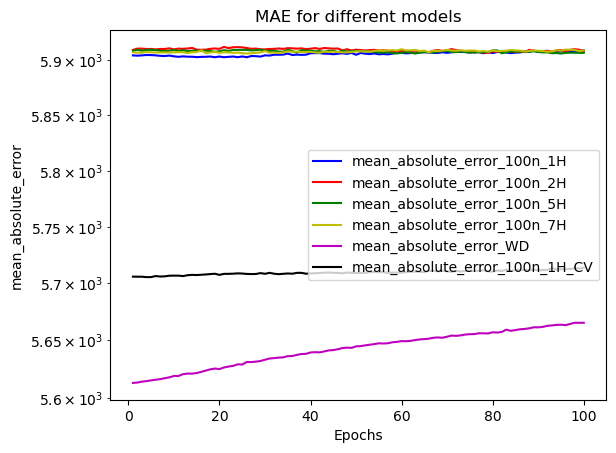

In [380]:
# Get the loss values from history_1
mean_absolute_error_100n_1H = history_100n_1H.history['mean_absolute_error']
mean_absolute_error_100n_2H  = history_100n_2H.history['mean_absolute_error']
mean_absolute_error_100n_5H  = history_100n_5H.history['mean_absolute_error']
mean_absolute_error_100n_7H  = history_100n_7H.history['mean_absolute_error']
mean_absolute_error_wd = history_wd.history['mean_absolute_error']
mean_absolute_error_100n_1H_CV = history_100n_1H_CV.history['mean_absolute_error']

# Plot the training and validation loss
epochs = range(1, len(mean_absolute_error_100n_1H) + 1)
plt.plot(epochs, mean_absolute_error_100n_1H, 'b', label='mean_absolute_error_100n_1H')
plt.plot(epochs, mean_absolute_error_100n_2H, 'r', label='mean_absolute_error_100n_2H')
plt.plot(epochs, mean_absolute_error_100n_5H, 'g', label='mean_absolute_error_100n_5H')
plt.plot(epochs, mean_absolute_error_100n_7H, 'y', label='mean_absolute_error_100n_7H')
plt.plot(epochs, mean_absolute_error_wd, 'm', label='mean_absolute_error_WD')
plt.plot(epochs, mean_absolute_error_100n_1H_CV, 'k', label='mean_absolute_error_100n_1H_CV')


plt.title('MAE for different models')
plt.xlabel('Epochs')
plt.ylabel('mean_absolute_error')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.legend()
plt.show()

# Cross validation on model with one layer and 100 nurons
- I run again the model with one layer and 100 nurons but this time I use corss validation and the black line compard to the blue line shows how cross validation can improve the model's performance.